# Preparing the E1 values from the raw HIC data, but mapped to the new reference T2T-MMUv1

## Adapt workflow from hic-spermatogenesis

The workflow was adapted to work with NCBI (the assembly is not yet on UCSC)


Use MultiQC to visualize the dedup and mapping steps


In [19]:
%%bash 

mkdir ../data/multiqc/

for dir in $(ls ../steps/pairs/); do
    echo $dir
    multiqc -i $dir -o ../data/multiqc/ -d ../steps/pairs/$dir 
    echo ""

done


fibroblast



/// ]8;id=777633;https://multiqc.info\MultiQC]8;;\ 🔍 v1.25.1

     update_config | Report title: fibroblast
     update_config | Prepending directory to sample names
     version_check | MultiQC Version v1.29 now available!
       file_search | Search path: /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/steps/pairs/fibroblast
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 42/42  42  
         pairtools | Found 7 reports
     write_results | Data        : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/fibroblast_multiqc_report_data
     write_results | Report      : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/fibroblast_multiqc_report.html
           multiqc | MultiQC complete



pachytene_spermatocyte



/// ]8;id=723026;https://multiqc.info\MultiQC]8;;\ 🔍 v1.25.1

     update_config | Report title: pachytene_spermatocyte
     update_config | Prepending directory to sample names
     version_check | MultiQC Version v1.29 now available!
       file_search | Search path: /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/steps/pairs/pachytene_spermatocyte
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 36/36  36  
         pairtools | Found 6 reports
     write_results | Data        : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/pachytene_spermatocyte_multiqc_report_data
     write_results | Report      : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/pachytene_spermatocyte_multiqc_report.html
           multiqc | MultiQC complete



round_spermatid



/// ]8;id=454410;https://multiqc.info\MultiQC]8;;\ 🔍 v1.25.1

     update_config | Report title: round_spermatid
     update_config | Prepending directory to sample names
     version_check | MultiQC Version v1.29 now available!
       file_search | Search path: /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/steps/pairs/round_spermatid
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 36/36  sm  
         pairtools | Found 6 reports
     write_results | Data        : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/round_spermatid_multiqc_report_data
     write_results | Report      : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/round_spermatid_multiqc_report.html
           multiqc | MultiQC complete



sperm



/// ]8;id=414573;https://multiqc.info\MultiQC]8;;\ 🔍 v1.25.1

     update_config | Report title: sperm
     update_config | Prepending directory to sample names
     version_check | MultiQC Version v1.29 now available!
       file_search | Search path: /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/steps/pairs/sperm
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 30/30  30  
         pairtools | Found 5 reports
     write_results | Data        : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/sperm_multiqc_report_data
     write_results | Report      : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/sperm_multiqc_report.html
           multiqc | MultiQC complete



spermatogonia



/// ]8;id=139413;https://multiqc.info\MultiQC]8;;\ 🔍 v1.25.1

     update_config | Report title: spermatogonia
     update_config | Prepending directory to sample names
     version_check | MultiQC Version v1.29 now available!
       file_search | Search path: /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/steps/pairs/spermatogonia
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 42/42  42  
         pairtools | Found 7 reports
     write_results | Data        : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/spermatogonia_multiqc_report_data
     write_results | Report      : /faststorage/project/hic-spermatogenesis/people/sojern/hic-compartment-borders/data/multiqc/spermatogonia_multiqc_report.html
           multiqc | MultiQC complete


## Rename chromosomes from accessions to chromosomes

Use the assembly information file from NCBI

In [31]:
import cooler
import pandas as pd
import glob

%config InlineBackend.figure_format = 'svg'



In [ ]:

mclrs = glob.glob("../steps/cool/*/*.merged.mcool")
clrs = [f"{mcl}::{res}" for mcl in mclrs for res in cooler.fileops.list_coolers(mcl)]

# Locate the assembly report
report = "../steps/ref/T2T-MMU8v1.0/assembly_report.txt"

rep = pd.read_csv(report, sep="\t")
length = rep[["Sequence-Length","Sequence-Name"]]
rep_dict = rep.set_index("GenBank-Accn")["Sequence-Name"].to_dict()
inv_dict = rep.set_index("Sequence-Name")["GenBank-Accn"].to_dict()


for clr in clrs:
    tmp_clr = cooler.Cooler(clr)
    cooler.rename_chroms(tmp_clr, rep_dict)




## Calculate the GC content 

of the binned versions of the assembly (according to resolutions in mcool).

I will try to use the CLI to make quick work of it.

It is used as the phasing track for the eigendecomposition.


In [82]:
%%bash 

REF=../steps/ref/T2T-MMU8v1.0/T2T-MMU8v1.0.renamed.fa

#for res in 1000 5000 10000 50000 100000; do
for res in 50000; do
    BINS=../data/bins/t2tbins.${res}.tsv
    GC_OUT=../data/bins/gc.${res}.tsv
    cooltools genome gc $BINS $REF > $GC_OUT
done

## Infer the centromeres

I found a `T2T-MMU8v1repeatMasker.out.gz` file and placed it `../steps/ref/T2T-MMU8v1/`, then extracted information about longest stretches of satellite repeats. 


In [ ]:
%%bash 

# Navigate
cd ../steps/ref/T2T-MMU8v1.0

# Download repeatmasker output 
wget https://hgdownload.soe.ucsc.edu/hubs/GCA/049/350/105/GCA_049350105.1/GCA_049350105.1.repeatMasker.out.gz .

# Find all the satellite repeats in the assembly
zcat GCA_049350105.1.repeatMasker.out.gz | \
awk 'NR > 3 && $11 ~ /[Ss]atellite/ { print $5, $6-1, $7, $10 }' OFS='\t' > satellite_repeats.bed

# Find the satellite repeats on chrX
zcat GCA_049350105.1.repeatMasker.out.gz | \
awk 'NR > 3 && $5 == "CM111679.1" && $11 ~ /[Ss]atellite/ { print $5, $6-1, $7, $10 }' OFS="\t" > chrX_satellites.bed

# Merge the satellite repeats to find the centromere
bedtools sort -i chrX_satellites.bed | \
bedtools merge -d 20000 -c 4 -o distinct > chrX_centromere.bed

# Find the largest satellite repeat
awk '{ print $0, $3 - $2 }' chrX_centromere.bed | sort -k5,5nr | head -n1

## Plot the satellites along the genome

In [ ]:
import pandas as pd

satellites = pd.read_csv("../steps/ref/T2T-MMU8v1.0/chrX_centromere.bed", sep="\t",names=['chrom', 'start', 'end', 'type'])

satellites = satellites.assign(length = satellites['end'] - satellites['start'])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def plot_intervals(intervals, **kwargs):
    f, ax = plt.subplots(figsize=(10, 1), sharex=True)
    for start, end in zip(intervals['start'], intervals['end']):
        rect = Rectangle((start, 0.1), width=end-start, height=0.9, color='tab:red', linewidth=0, **kwargs)
        ax.add_patch(rect)
    ax.spines[:].set_visible(False)
    ax.spines['bottom'].set_visible(True)

    ax.set_yticks([])
    ticks = np.linspace(0, intervals['end'].max(), num=15)
    ax.set_xticks(ticks) 
    ax.set_xticklabels([f'{int(t/1e6)} Mbp' for t in ticks])
    f.tight_layout()


chrom          CM111679.1
start            57984683
end              69396537
type      ALR/Alpha,HSAT4
length           11411854
Name: 8, dtype: object


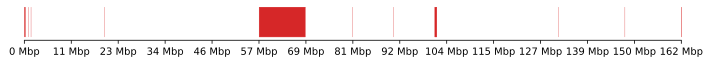

In [76]:
plot_intervals(satellites, lw=0.3, alpha=1)

largest = satellites.loc[satellites['length'].idxmax()]
print(largest)

In [79]:
from bioframe import make_viewframe

X_length = rep.query('`Sequence-Name` == "chrX"')['Sequence-Length'].values[0]


view_T2T_MMU8v1_X_chromarms = make_viewframe([('chrX', 0, largest['start'], "small_arm"), 
               ('chrX', largest['start'], largest['end'], 'centromere'),
               ('chrX', largest['end'], X_length, 'large_arm')])

view_T2T_MMU8v1_X_chromarms.to_csv("../data/view_T2T_MMU8v1_X_chromarms.tsv",  index=False, header=False, sep='\t')

## Do the eigendecomposition

In [ ]:
%%bash 

# Find multires coolers
MCOOLS=../steps/cool/*/*.merged.mcool

# Define the viewframe
VIEW=../data/view_T2T_MMU8v1_X_chromarms.tsv

for MCOOL in $MCOOLS; do
    # Get the tissue name
    TISSUE=$(basename $MCOOL .merged.mcool)
    echo $TISSUE
    for res in 1000 5000 10000 50000 100000; do
        COOLER=$MCOOL::resolutions/$res
        GC_BINS=../data/bins/gc.${res}.tsv
        EIGS_OUT=../data/eigs/$TISSUE.eigs.$res

        echo -ne ' -' $res OK
        cooltools eigs-cis -o $EIGS_OUT --view $VIEW --phasing-track $GC_BINS --n-eigs 3 $COOLER

    done
    echo ""
done

echo All done

fibroblast
 - 1000 OK - 5000 OK - 10000 OK - 50000 OK - 100000 OK
pachytene_spermatocyte
 - 1000 OK - 5000 OK - 10000 OK - 50000 OK - 100000 OK
round_spermatid
 - 1000 OK - 5000 OK - 10000 OK - 50000 OK - 100000 OK
spermatogonia
 - 1000 OK - 5000 OK - 10000 OK - 50000 OK - 100000 OK
sperm
 - 1000 OK - 5000 OK - 10000 OK - 50000 OK - 100000 OK
All done


## Check the results by eye

### Define the eigenvectors

In [1]:
import pandas as pd
from glob import glob
import os

eigfiles = glob("../data/eigs/*vecs.tsv")
eignames = [os.path.basename(eig).split('.cis')[0] for eig in eigfiles]
eignames

df_eig = pd.DataFrame({
    'path': eigfiles,
    'tissue': [eigname.split('.eigs.')[0] for eigname in eignames],
    'resolution': [eigname.split('.eigs.')[1] for eigname in eignames]
})



In [2]:
sperm_1000 = pd.read_csv(df_eig.query('tissue == "sperm" and resolution == "1000"')['path'].values[0], sep="\t", header=0)

display(sperm_1000.head())

sperm_dict = {
    res: pd.read_csv(df_eig.query('tissue == "sperm" and resolution == @res')['path'].values[0], sep="\t", header=0) for res in df_eig['resolution'].unique()
}

fib_dict = {
    res: pd.read_csv(df_eig.query('tissue == "fibroblast" and resolution == @res')['path'].values[0], sep="\t", header=0) for res in df_eig['resolution'].unique()
}

print(sperm_dict['1000'].head())


,chrom,start,end,weight,E1,E2,E3
0,chrX,0,1000,NaN,NaN,NaN,NaN
1,chrX,1000,2000,NaN,NaN,NaN,NaN
2,chrX,2000,3000,NaN,NaN,NaN,NaN
3,chrX,3000,4000,NaN,NaN,NaN,NaN
4,chrX,4000,5000,NaN,NaN,NaN,NaN


  chrom  start   end  weight  E1  E2  E3
0  chrX      0  1000     NaN NaN NaN NaN
1  chrX   1000  2000     NaN NaN NaN NaN
2  chrX   2000  3000     NaN NaN NaN NaN
3  chrX   3000  4000     NaN NaN NaN NaN
4  chrX   4000  5000     NaN NaN NaN NaN


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the E1 tracks saved in the sperm_dict

def plot_eigenvectors(eigenvectors, title=None):
    fig, ax = plt.subplots(figsize=(10, 2))

    x = eigenvectors['start']
    y = eigenvectors['E1']

    ax.fill_between(x, y, where = y<0, color='tab:blue', lw=1, ec='None')
    ax.fill_between(x, y, where = y>0, color='tab:red', lw=1, ec='None') 
    ax.set_title(title)
    ax.set_ylabel('E1')
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-1,1)
    ax.set_xlabel('Genomic Position (Mbp)')
    ticks = np.linspace(0, x.max(), num=10)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f'{int(t/1e6)} Mbp' for t in ticks])
    ax.spines[:].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    fig.tight_layout()


#res = '100000'
#plot_eigenvectors(sperm_dict[res], title=f'Sperm E1 at {int(int(res)/1000)}kb resolution')

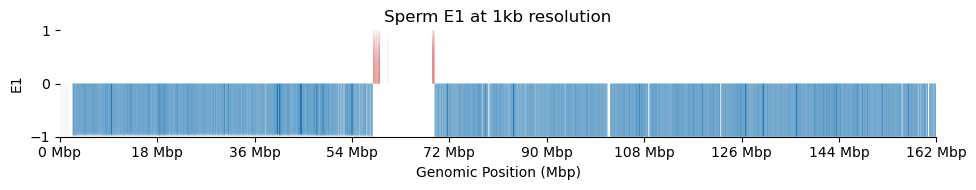

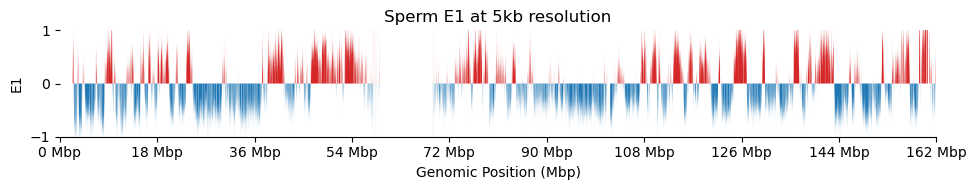

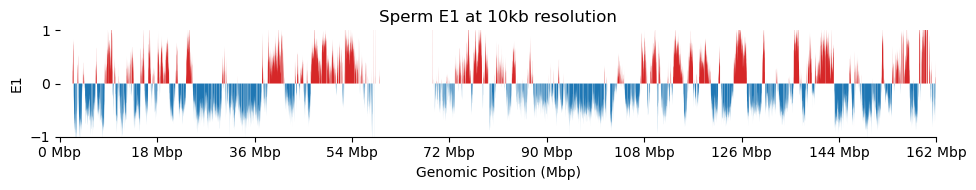

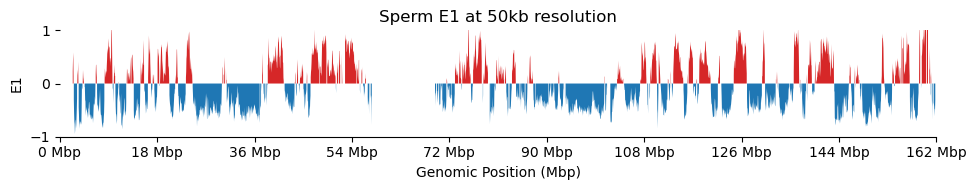

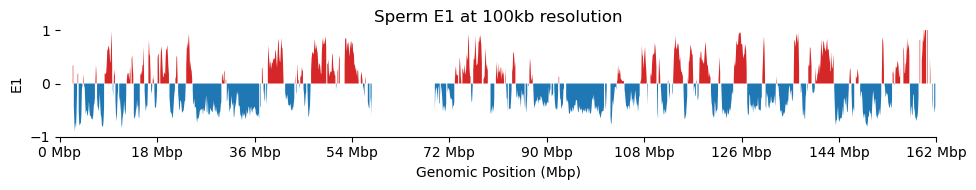

In [11]:
  
for res in ['1000', '5000', '10000', '50000', '100000']:
    plot_eigenvectors(sperm_dict[res], title=f'Sperm E1 at {int(int(res)/1000)}kb resolution')




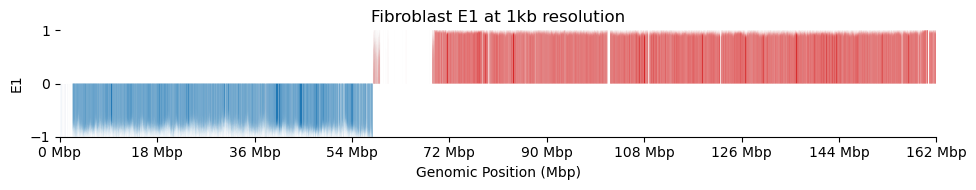

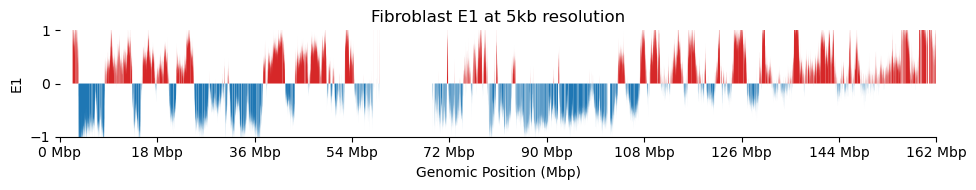

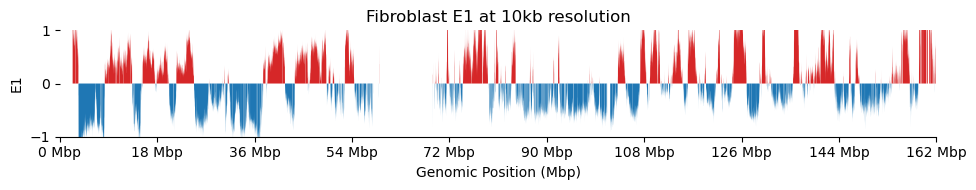

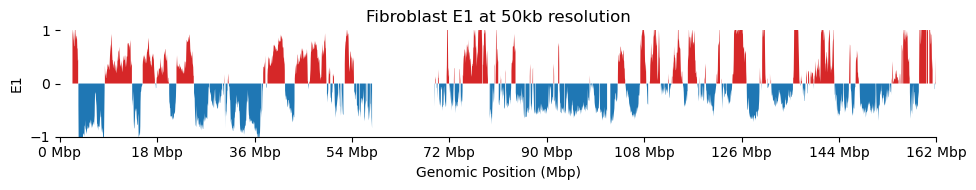

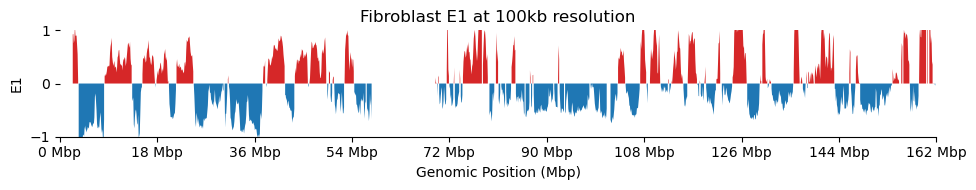

In [5]:
for res in ['1000', '5000', '10000', '50000', '100000']:
    plot_eigenvectors(fib_dict[res], title=f'Fibroblast E1 at {int(int(res)/1000)}kb resolution')

> It looks like the 1kb resolution E1 does not reflect A/B-compartmentalization, but only the variance between the three partitions in the viewframe. 

I don't understand that. The partitioning should eliminate the variance between the three partitions, so this could mean that 

1) there is not much variance within the partitions at this resolution
2) the viewframe is too large 

There are *a lot* of missing values in the 1kb resolution weight and E1, possibly because cooler found that too few contacts were observed to include the bins. That results in a practically unusable E1 track. 

In [17]:
df = pd.read_csv("../data/eigs/fibroblast.eigs.1000.cis.vecs.tsv", sep="\t", header=0)

df.isna().sum()

chrom         0
start         0
end           0
weight    25734
E1        25735
E2        25735
E3        25735
dtype: int64